## Testing Serial Ports
For interfacing with our microprocessor

In [1]:
pip install pyserial

     ---------------------------------------- 0.0/90.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.6 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/90.6 kB ? eta -:--:--
     ------------------------- ------------ 61.4/90.6 kB 656.4 kB/s eta 0:00:01
     -------------------------------------- 90.6/90.6 kB 730.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### Plotting

In [5]:
distances = [543, 435, 67, 700, 505, 43, 667, 900]  # Replace with your actual distance data

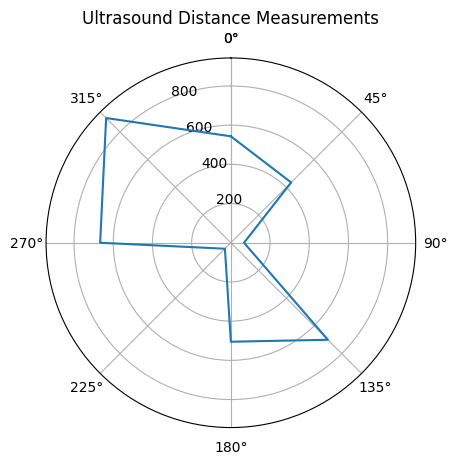

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance_data(distances):
    # Check if the length of the distances array is 8
    if len(distances) != 8:
        raise ValueError("The distance array must contain 8 elements.")

    # Create an array for the angles (0, 45, 90, ..., 315 degrees)
    angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)

    # Repeat the first value to close the circle in the plot
    distances = np.append(distances, distances[0])
    angles = np.append(angles, angles[0])

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, distances)

    # Set the direction of the zero angle
    ax.set_theta_zero_location('N')

    # Set the angle offset (counterclockwise)
    ax.set_theta_direction(-1)

    # Add labels, title, etc.
    angle_labels = [f'{deg}°' for deg in range(0, 360, 45)] + ['0°']  # Add label for 360° (same as 0°)
    ax.set_thetagrids(np.degrees(angles), labels=angle_labels)
    ax.set_title('Ultrasound Distance Measurements (mm)')
    ax.set_rlabel_position(-22.5)  # Move radial labels

    # Show the plot
    plt.show()

# Example usage

plot_distance_data(distances)


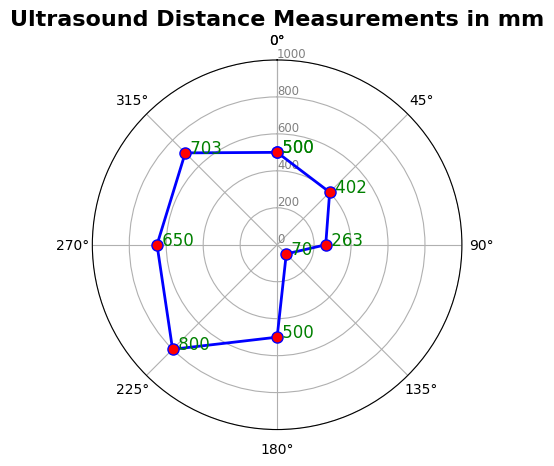

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distance_data(distances_mm):
    # Check if the length of the distances array is 8
    if len(distances_mm) != 8:
        raise ValueError("The distance array must contain 8 elements.")


    # Create an array for the angles (0, 45, 90, ..., 315 degrees)
    angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)

    # Repeat the first value to close the circle in the plot
    distances_mm = np.append(distances_mm, distances_mm[0])
    angles = np.append(angles, angles[0])

    # Create a polar plot
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(angles, distances_mm, color='blue', linestyle='-', linewidth=2, marker='o', markersize=8, markerfacecolor='red')

    # Set the direction of the zero angle
    ax.set_theta_zero_location('N')

    # Set the angle offset (counterclockwise)
    ax.set_theta_direction(-1)

    # Add labels, title, etc.
    angle_labels = [f'{deg}°' for deg in range(0, 360, 45)] + ['0°']  # Add label for 360° (same as 0°)
    ax.set_thetagrids(np.degrees(angles), labels=angle_labels)
    ax.set_title('Ultrasound Distance Measurements in mm', fontsize=16, fontweight='bold')
    ax.set_rlabel_position(-22.5)  # Move radial labels
    #ax.set_rgrids(range(1000, int(max(distances_mm)) + 100, 1000), angle=0, color="gray", size="small")  # Add grid lines
        # Add radial grid lines
    grid_radii = np.linspace(0, 1000, num=6)  # Adjust the number of grid lines as needed
    ax.set_rgrids(grid_radii, labels=[f'{r:.0f}' for r in grid_radii], angle=0, color="gray", size='small')

    # Annotate each point with its distance in mm
    for angle, distance in zip(angles, distances_mm):
        ax.text(angle, distance, f' {distance:.0f}', color='green', size=12)

    # Show the plot
    plt.show()

# Example usage
distances_mm = [500, 402, 263, 70, 500, 800, 650, 703]  # Replace with your actual distance data
plot_distance_data(distances_mm)

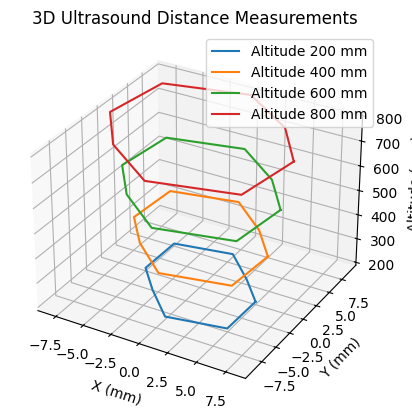

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_distance_data(distances, altitudes):
    # Validate the distances array
    if not all(len(d) == 8 for d in distances):
        raise ValueError("Each set of distance measurements must contain 8 elements.")

    if len(distances) != len(altitudes):
        raise ValueError("The number of distance sets must match the number of altitudes.")

    # Convert distances to millimeters
    distances_mm = [[d * 1000 for d in distance_set] for distance_set in distances]

    # Set up the figure and 3D axis
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create an array for the angles (0, 45, 90, ..., 315 degrees)
    angles = np.linspace(0, 2 * np.pi, 8, endpoint=False)
    angles = np.append(angles, angles[0])  # Close the circle

    # Plot each set of distance measurements
    for altitude, distance_set in zip(altitudes, distances_mm):
        # Repeat the first value to close the circle in the plot
        distance_set = np.append(distance_set, distance_set[0])

        # Convert polar coordinates to Cartesian coordinates for 3D plotting
        x = distance_set * np.cos(angles)
        y = distance_set * np.sin(angles)
        z = np.full_like(x, altitude)

        # Plot
        ax.plot(x, y, z, label=f'Altitude {altitude} mm')

    # Set labels and title
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Altitude (mm)')
    ax.set_title('3D Ultrasound Distance Measurements')

    # Legend
    ax.legend()

    # Show the plot
    plt.show()

# Example usage
distances = [
    [0.005, 0.004, 0.006, 0.007, 0.005, 0.004, 0.006, 0.007],  # Altitude 1
    [0.006, 0.005, 0.007, 0.008, 0.006, 0.005, 0.007, 0.008],  # Altitude 2
    [0.007, 0.006, 0.008, 0.009, 0.007, 0.006, 0.008, 0.009],  # Altitude 3
    [0.008, 0.007, 0.009, 0.010, 0.008, 0.007, 0.009, 0.010]   # Altitude 4
]
altitudes = [200, 400, 600, 800]  # Example altitudes in mm
plot_3d_distance_data(distances, altitudes)
